In [105]:
#By using percentage data

import pandas as pd
import numpy as np
import googlefinance 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from sklearn.metrics import r2_score
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")



df_TSM = pd.read_csv('TSM_2018_2021.csv', usecols = ['Date','Adj Close'], low_memory = False)
#df_TSM.tail(100)

#r = df['mid.c'].astype(float).pct_change(1)pct
pct_TSM = df_TSM['Adj Close'].astype(float).pct_change()
pct_TSM

df_TSM['pct_TSM'] = pct_TSM
del df_TSM['Adj Close']
df_TSM
#df_ = df.set_index(['Date'])




,Date,pct_TSM
0,2018-01-02,NaN
1,2018-01-03,0.016821
2,2018-01-04,-0.005274
3,2018-01-05,0.023379
4,2018-01-08,-0.000471
...,...,...
876,2021-06-25,-0.006056
877,2021-06-28,0.026431
878,2021-06-29,0.005184
879,2021-06-30,-0.000582


In [106]:
df_APPL = pd.read_csv('APPL_2018_2021.csv', usecols = ['Date','Adj Close'], low_memory = False)
#df_APPL.tail(100)
pct_APPL = df_APPL['Adj Close'].astype(float).pct_change()
pct_APPL
df_APPL['pct_APPL'] = pct_APPL
del df_APPL['Adj Close']
df_APPL

,Date,pct_APPL
0,2018-01-02,NaN
1,2018-01-03,-0.000174
2,2018-01-04,0.004645
3,2018-01-05,0.011385
4,2018-01-08,-0.003714
...,...,...
876,2021-06-25,-0.002249
877,2021-06-28,0.012546
878,2021-06-29,0.011500
879,2021-06-30,0.004621


In [107]:
df_TSLA = pd.read_csv('TSLA_2018_2021.csv', usecols = ['Date','Adj Close'], low_memory = False)
#df_APPL.tail(100)
pct_TSLA = df_TSLA['Adj Close'].astype(float).pct_change()
pct_TSLA
df_TSLA['pct_TSLA'] = pct_TSLA
del df_TSLA['Adj Close']
df_TSLA

,Date,pct_TSLA
0,2018-01-02,NaN
1,2018-01-03,-0.010233
2,2018-01-04,-0.008290
3,2018-01-05,0.006230
4,2018-01-08,0.062638
...,...,...
877,2021-06-28,0.025079
878,2021-06-29,-0.011558
879,2021-06-30,-0.001557
880,2021-07-01,-0.002619


In [108]:
dfs = [df_TSM, df_APPL, df_TSLA]

dfs

df_final = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)

df_final.tail(1000)




,Date,pct_TSM,pct_APPL,pct_TSLA
0,2018-01-02,NaN,NaN,NaN
1,2018-01-03,0.016821,-0.000174,-0.010233
2,2018-01-04,-0.005274,0.004645,-0.008290
3,2018-01-05,0.023379,0.011385,0.006230
4,2018-01-08,-0.000471,-0.003714,0.062638
...,...,...,...,...
876,2021-06-25,-0.006056,-0.002249,-0.011694
877,2021-06-28,0.026431,0.012546,0.025079
878,2021-06-29,0.005184,0.011500,-0.011558
879,2021-06-30,-0.000582,0.004621,-0.001557


/Users/freyahu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


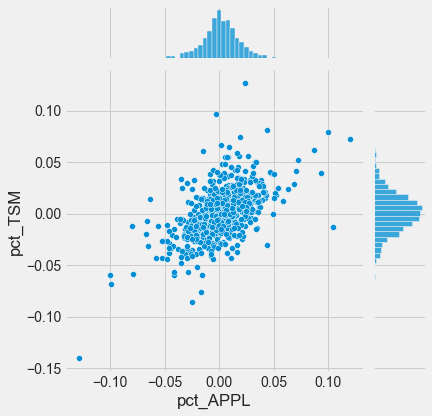

In [109]:
#APPL and TSM scatter correlation

sns.jointplot('pct_APPL', 'pct_TSM', df_final, kind='scatter')


In [1]:
#AAPL and TSM correlation R2 square
# tsla = df_TSLA['Adj Close'].astype(float)
# appl = df_APPL['Adj Close'].astype(float)

# a = tsla.tail(500)
# b = appl.tail(500)

#To use percentage change to r1 sqaure
a = pct_APPL.tail(500)
b = pct_TSM.tail(500)

r2_APTSM = r2_score(a,b)
r2_APTSM

NameError: name 'pct_APPL' is not defined

/Users/freyahu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


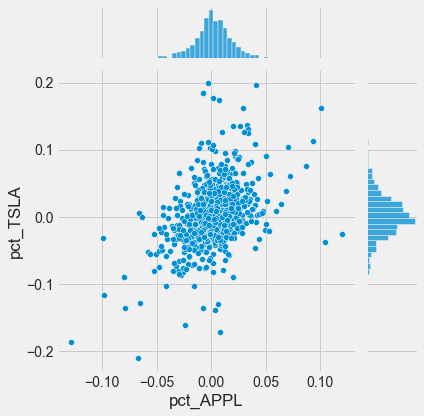

In [92]:
#AAPL and TSLA correlation 
sns.jointplot('pct_APPL', 'pct_TSLA', df_final, kind='scatter')

In [97]:
#APPL and TSLA R2 square 

x = pct_APPL.tail(500)
y = pct_TSLA.tail(500)

r2_APTSLA = r2_score(x,y)
r2_APTSLA

-4.333294442007443

/Users/freyahu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


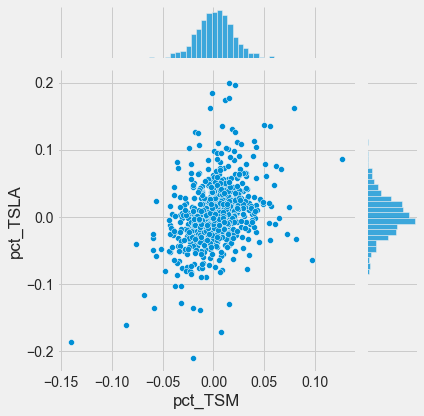

In [98]:
#TSM and TSLA correlation (scatter)
sns.jointplot('pct_TSM', 'pct_TSLA', df_final, kind='scatter')

In [103]:
#TSM and TSLA R2 square

x = pct_TSM.tail(500)
y = pct_TSLA.tail(500)

r2_TSMTSLA = r2_score(x,y)
r2_TSMTSLA


-3.8541703753070964